<img src="tech.jpeg" width="500" height="500" align="center"/>

# --- * Problem Statement And Hypothesis Generation

#### In BigMart there is  products across 10 stores collected in 2013 , Each Store has certain products, So the problem is to build ML models that can predict the sales for each product in the stores.




#### We can make some of hypothesis generation befor looking for the data set. :
#### - its important to know the type of the product.
#### - its important to the store that have this product is to be near to  the customers or not.
#### - its important to know what is the culture of the people and how this product type will server them , so it will devide the    products into categories and each product will have a range in price.
#### - its important to know the material and the component of each product type so this will be important factor 
#### - its important to know the suitable time to make special price for each product beacause many products change price from time to another depending on many factors , so we need to make this factor suitable for all customers.


# Loading Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image




In [2]:
Train_df=pd.read_csv('Train.csv')


In [3]:
Test_df=pd.read_csv('Test.csv')

In [4]:
Train_df.shape

(8523, 12)

In [5]:
Test_df.shape

(5681, 11)

In [6]:
Train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA Process

In [7]:
DataFrame=pd.concat([Train_df,Test_df], axis=0,sort=False).reset_index()

In [8]:
DataFrame.reset_index(drop=True,inplace=True)

In [9]:
DataFrame

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [10]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      14204 non-null  int64  
 1   Item_Identifier            14204 non-null  object 
 2   Item_Weight                11765 non-null  float64
 3   Item_Fat_Content           14204 non-null  object 
 4   Item_Visibility            14204 non-null  float64
 5   Item_Type                  14204 non-null  object 
 6   Item_MRP                   14204 non-null  float64
 7   Outlet_Identifier          14204 non-null  object 
 8   Outlet_Establishment_Year  14204 non-null  int64  
 9   Outlet_Size                10188 non-null  object 
 10  Outlet_Location_Type       14204 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usag

In [11]:
DataFrame['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

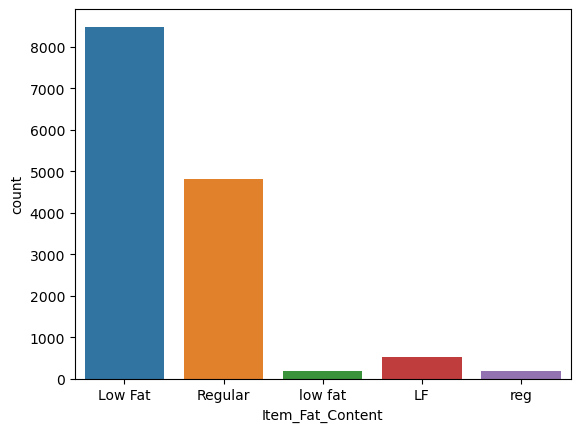

In [12]:
sns.countplot(x='Item_Fat_Content',data=DataFrame)

In [13]:
def fat_cont(name):
    if name=='low fat':
        return 'Low Fat'
    elif name=='LF':
        return 'Low Fat'
    elif name== 'reg':
        return 'Regular'
    else:
        return name
    

In [14]:
DataFrame['Item_Fat_Content']=DataFrame['Item_Fat_Content'].apply(fat_cont)

In [15]:
DataFrame['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

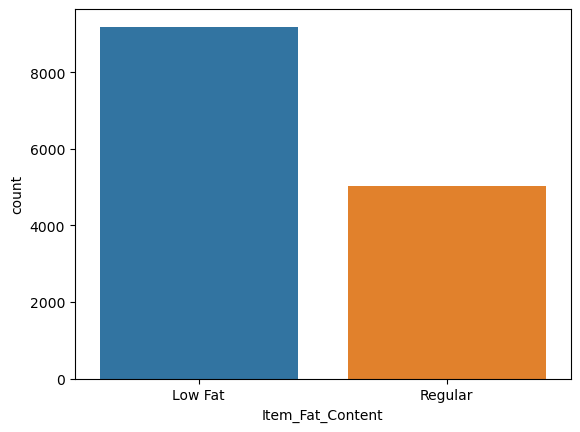

In [16]:
sns.countplot(x='Item_Fat_Content',data=DataFrame)

In [17]:
DataFrame['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [18]:
DataFrame

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


# Handling Missing Vlaues With KNN imputer

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [20]:
DataFrame['Item_Weight']=imputer.fit_transform(DataFrame[['Item_Weight']])
DataFrame['Item_Weight'].isna().sum()

0

### Impute with Mode using SimpleImputer

In [21]:
from sklearn.impute import SimpleImputer
imputer2= SimpleImputer(strategy='most_frequent')

In [22]:
DataFrame['Outlet_Size']=imputer2.fit_transform(DataFrame[['Outlet_Size']])
DataFrame['Outlet_Size'].isna().sum()

0

In [23]:
DataFrame.isna().sum()

index                           0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#  Duplicates

In [24]:
Duplicated=DataFrame.duplicated()
Duplicated.sum()
# No Duplicates!

0

# Handling Outlier

<Axes: xlabel='Item_MRP'>

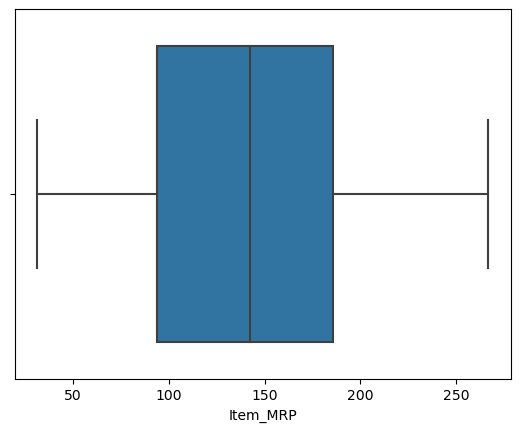

In [25]:
sns.boxplot(x='Item_MRP', data=DataFrame)


In [26]:
from datasist.structdata import detect_outliers


In [27]:
outliers_indices = detect_outliers(DataFrame, 0,['Item_Visibility'])
len(outliers_indices)

261

In [28]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      14204 non-null  int64  
 1   Item_Identifier            14204 non-null  object 
 2   Item_Weight                14204 non-null  float64
 3   Item_Fat_Content           14204 non-null  object 
 4   Item_Visibility            14204 non-null  float64
 5   Item_Type                  14204 non-null  object 
 6   Item_MRP                   14204 non-null  float64
 7   Outlet_Identifier          14204 non-null  object 
 8   Outlet_Establishment_Year  14204 non-null  int64  
 9   Outlet_Size                14204 non-null  object 
 10  Outlet_Location_Type       14204 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usag

In [29]:
cols_to_check=['Item_Weight','Item_Visibility','Item_MRP']
cols_to_check

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [30]:
for i in cols_to_check:
    q1 = np.quantile(DataFrame[i], 0.25)
    q3 = np.quantile(DataFrame[i], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = DataFrame[i][(DataFrame[i] < lower) | (DataFrame[i] > upper)]
    print(len(outliers))


0
261
0


In [31]:
sns.boxplot(x='Item_Visibility', data=DataFrame)
sns.stripplot(x='Item_Visibility', data=DataFrame,color="#474646")


<Axes: xlabel='Item_Visibility'>

In [32]:

sns.stripplot(x='Item_Visibility', data=DataFrame,color="#474646")


<Axes: xlabel='Item_Visibility'>

In [33]:
# Remove Outlayers 

In [38]:
DataFrame.drop(outliers_indices, inplace=True)
DataFrame

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [39]:
outliers_indices = detect_outliers(DataFrame, 0,['Item_Visibility'])
len(outliers_indices)

0

In [40]:
sns.boxplot(x='Item_Visibility', data=DataFrame)
sns.stripplot(x='Item_Visibility', data=DataFrame,color="#474646")


<Axes: xlabel='Item_Visibility'>

# Univariate Analysis & Bivariate Analysis

In [41]:
sns.stripplot(y='Item_Visibility',x='Item_Type',data=DataFrame)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

In [42]:
DataFrame.groupby('Item_Type')['Item_Visibility'].mean()

Item_Type
Baking Goods             0.064289
Breads                   0.065750
Breakfast                0.077888
Canned                   0.063406
Dairy                    0.067980
Frozen Foods             0.063275
Fruits and Vegetables    0.064778
Hard Drinks              0.062261
Health and Hygiene       0.053932
Household                0.057060
Meat                     0.056735
Others                   0.054553
Seafood                  0.064978
Snack Foods              0.063507
Soft Drinks              0.062068
Starchy Foods            0.063034
Name: Item_Visibility, dtype: float64

In [43]:
sns.barplot(x='Item_Type',y='Item_Weight',data=DataFrame)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

In [44]:
DataFrame.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.375124
Breads                   11.420071
Breakfast                13.077091
Canned                   12.462803
Dairy                    13.162868
Frozen Foods             12.601884
Fruits and Vegetables    13.132405
Hard Drinks              11.760501
Health and Hygiene       13.129082
Household                13.244803
Meat                     12.767584
Others                   13.676187
Seafood                  12.851569
Snack Foods              12.853084
Soft Drinks              11.968559
Starchy Foods            13.562791
Name: Item_Weight, dtype: float64

In [45]:
sns.swarmplot(x='Item_Type',y='Item_Weight',data=DataFrame)
plt.xticks(rotation=90)

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abdelrahmanhe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

In [46]:
DataFrame.groupby('Item_Type')['Item_Weight'].max()

Item_Type
Baking Goods             20.85
Breads                   20.85
Breakfast                21.10
Canned                   21.35
Dairy                    20.70
Frozen Foods             20.85
Fruits and Vegetables    21.35
Hard Drinks              19.70
Health and Hygiene       21.25
Household                21.25
Meat                     21.25
Others                   20.50
Seafood                  20.75
Snack Foods              21.25
Soft Drinks              20.75
Starchy Foods            21.20
Name: Item_Weight, dtype: float64

In [47]:
DataFrame.corr()

/var/folders/1z/m3ds1sjn2b7f6f6djdk31p8w0000gn/T/ipykernel_38009/1616280365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataFrame.corr()


,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
index,1.000000,-0.011149,0.006752,-0.001655,-0.001798,-0.005135
Item_Weight,-0.011149,1.000000,-0.010551,0.032568,0.000702,0.008807
Item_Visibility,0.006752,-0.010551,1.000000,-0.001935,-0.035837,-0.066466
Item_MRP,-0.001655,0.032568,-0.001935,1.000000,-0.000899,0.577690
Outlet_Establishment_Year,-0.001798,0.000702,-0.035837,-0.000899,1.000000,-0.067379
Item_Outlet_Sales,-0.005135,0.008807,-0.066466,0.577690,-0.067379,1.000000


In [48]:
sns.countplot(x='Outlet_Size', data=DataFrame)

<Axes: xlabel='Outlet_Size', ylabel='count'>

In [49]:
DataFrame.groupby('Item_Type')['Item_Fat_Content'].value_counts().sort_values(ascending=False)

Item_Type              Item_Fat_Content
Household              Low Fat             1528
Snack Foods            Low Fat             1114
Fruits and Vegetables  Low Fat             1064
                       Regular              906
Health and Hygiene     Low Fat              846
Snack Foods            Regular              832
Frozen Foods           Low Fat              717
Dairy                  Low Fat              680
Frozen Foods           Regular              675
Soft Drinks            Low Fat              606
Baking Goods           Low Fat              535
Canned                 Low Fat              528
                       Regular              528
Baking Goods           Regular              527
Meat                   Regular              447
Dairy                  Regular              433
Hard Drinks            Low Fat              355
Meat                   Low Fat              279
Others                 Low Fat              276
Breads                 Low Fat              217


In [50]:
sns.catplot(
    data=DataFrame, y="Item_Type", hue="Item_Fat_Content", kind="count",
    palette="pastel", edgecolor=".6",
)

In [51]:
DataFrame['Outlet_Location_Type'].value_counts()

Tier 3    5442
Tier 2    4639
Tier 1    3837
Name: Outlet_Location_Type, dtype: int64

In [52]:
sns.countplot(x='Outlet_Location_Type',data=DataFrame)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

In [53]:
DataFrame['Item_Fat_Content'].value_counts()

Low Fat    9016
Regular    4902
Name: Item_Fat_Content, dtype: int64

In [54]:
DataFrame['Outlet_Type'].value_counts()

Supermarket Type1    9291
Supermarket Type3    1559
Supermarket Type2    1545
Grocery Store        1523
Name: Outlet_Type, dtype: int64

In [ ]:
import plotly.graph_objects as go

l=DataFrame['Outlet_Type'].unique()
colors = ["gold", "mediumturquoise", "darkorange", "lightgreen"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=l,
            values=DataFrame['Outlet_Type'].value_counts(),
            textfont_size=20,
            marker=dict(color=colors, pattern=dict(shape=[".", "x", "+", "-"]))
        )
    ]
)

fig.show()

In [55]:
sns.catplot(
    data=DataFrame, y="Outlet_Type", hue="Outlet_Location_Type", kind="count",
    palette="pastel", edgecolor=".6",
)

In [56]:
sns.scatterplot(x='Item_Weight',y='Item_MRP',data=DataFrame)

<Axes: xlabel='count', ylabel='Outlet_Type'>

In [57]:
DataFrame.groupby('Outlet_Establishment_Year')['Item_MRP'].mean()

Outlet_Establishment_Year
1985    141.161633
1987    141.128428
1997    140.821982
1998    141.918084
1999    141.159727
2002    140.853407
2004    141.107228
2007    140.995401
2009    140.996019
Name: Item_MRP, dtype: float64

In [58]:
sns.catplot(x='Outlet_Establishment_Year',kind='box',y='Item_MRP', data=DataFrame)

In [59]:
df=DataFrame

In [60]:
df

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [61]:
DataFrame['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1549
OUT045    1547
OUT018    1545
OUT017    1542
OUT010     785
OUT019     738
Name: Outlet_Identifier, dtype: int64

In [ ]:
l2=DataFrame['Outlet_Identifier'].unique()
colors = ["gold", "mediumturquoise", "darkorange", "lightgreen"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=l2,
            values=DataFrame['Outlet_Identifier'].value_counts(),
            textfont_size=20,
            marker=dict(colors=colors, pattern=dict(shape=[".", "x", "+", "-","/","","|",'\\']))
                                                           
        )
    ]
)

fig.show()

In [62]:
DataFrame

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [63]:
sns.countplot(x='Outlet_Identifier', data=DataFrame, hue='Outlet_Size', palette="ch:.25")
sns.set(rc={'figure.figsize':(11,8.27)})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [64]:
DataFrame.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT010             Medium          785
OUT013             High           1553
OUT017             Medium         1542
OUT018             Medium         1545
OUT019             Small           738
OUT027             Medium         1559
OUT035             Small          1550
OUT045             Medium         1547
OUT046             Small          1550
OUT049             Medium         1549
Name: Outlet_Size, dtype: int64

In [65]:
sns.countplot(x='Outlet_Identifier', data=DataFrame, hue='Outlet_Type', palette="ch:.25")
sns.set(rc={'figure.figsize':(12,10)})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [66]:
DataFrame.groupby('Outlet_Identifier')['Outlet_Type'].value_counts()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store         785
OUT013             Supermarket Type1    1553
OUT017             Supermarket Type1    1542
OUT018             Supermarket Type2    1545
OUT019             Grocery Store         738
OUT027             Supermarket Type3    1559
OUT035             Supermarket Type1    1550
OUT045             Supermarket Type1    1547
OUT046             Supermarket Type1    1550
OUT049             Supermarket Type1    1549
Name: Outlet_Type, dtype: int64

In [67]:
sns.countplot(y='Outlet_Identifier', data=DataFrame, hue='Outlet_Establishment_Year')
sns.set(rc={'figure.figsize':(11,8.27)})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [68]:
DataFrame.groupby('Outlet_Identifier')['Outlet_Establishment_Year'].value_counts()

Outlet_Identifier  Outlet_Establishment_Year
OUT010             1998                          785
OUT013             1987                         1553
OUT017             2007                         1542
OUT018             2009                         1545
OUT019             1985                          738
OUT027             1985                         1559
OUT035             2004                         1550
OUT045             2002                         1547
OUT046             1997                         1550
OUT049             1999                         1549
Name: Outlet_Establishment_Year, dtype: int64

In [69]:
DataFrame

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [70]:
sns.pointplot(x='Outlet_Identifier',y='Outlet_Establishment_Year', data=DataFrame, hue='Outlet_Type',palette="ch:.25")
sns.set(rc={'figure.figsize':(12,10)})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [71]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Split the data into the previous split after cleaning

In [72]:
DataFrame.drop('index',axis=1,inplace=True)

In [73]:
DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [74]:
DataFrame=pd.get_dummies(DataFrame,columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier',\
'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first=True)

In [75]:
DataFrame

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,NaN,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
14200,7.60,0.142991,169.1448,NaN,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
14201,10.00,0.073529,118.7440,NaN,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
14202,15.30,0.000000,214.6218,NaN,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [76]:
df=DataFrame.iloc[:8354,:]

In [77]:
DataFrame

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,NaN,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
14200,7.60,0.142991,169.1448,NaN,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
14201,10.00,0.073529,118.7440,NaN,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
14202,15.30,0.000000,214.6218,NaN,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [78]:
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [79]:
df['Item_Outlet_Sales'].isna().sum()

0

In [80]:
pred=DataFrame.iloc[8354:,:]

In [81]:
pred.shape

(5564, 1602)

In [82]:
pred.drop('Item_Outlet_Sales',axis=1, inplace=True)

/var/folders/1z/m3ds1sjn2b7f6f6djdk31p8w0000gn/T/ipykernel_38009/2886682061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.drop('Item_Outlet_Sales',axis=1, inplace=True)


In [83]:
pred

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750000,0.007565,107.8622,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8524,8.300000,0.038428,87.3198,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
8525,14.600000,0.099575,241.7538,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8526,7.315000,0.015388,155.0340,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
8527,12.792854,0.118599,234.2300,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0.013496,141.3154,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
14200,7.600000,0.142991,169.1448,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
14201,10.000000,0.073529,118.7440,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
14202,15.300000,0.000000,214.6218,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [84]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']


# Split the data

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=72)

In [87]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3465,7.390000,0.082367,187.7530,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
238,12.792854,0.084555,109.8912,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
6802,13.650000,0.012824,55.5588,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
6898,14.100000,0.087921,228.5668,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7212,10.300000,0.070149,264.5226,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,20.200000,0.011820,151.6340,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8063,12.300000,0.116261,107.0938,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4019,19.850000,0.034942,61.9194,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7394,10.195000,0.000000,139.5838,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


# Normalizing and Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scale=StandardScaler()

In [90]:
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

# Modeling

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



models={'LR': LinearRegression(),
        "Lasso":Lasso(alpha=100),
        "Ridge":Ridge(alpha=100)}
for name , model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print (f"Name --> {name}, score--> {model.score(X_test,y_test)}")
    print (f"Name --> {name}, MAE--> {mean_absolute_error(y_test, y_pred)}")
    print (f"Name --> {name}, RMSE--> {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print('-'*50)


Name --> LR, score--> -6.39108410984004e+24
Name --> LR, MAE--> 376683440822155.56
Name --> LR, RMSE--> 4324352401396714.5
--------------------------------------------------
Name --> Lasso, score--> 0.5362893132403781
Name --> Lasso, MAE--> 856.5590296281613
Name --> Lasso, RMSE--> 1164.8160985041575
--------------------------------------------------
Name --> Ridge, score--> 0.3806035776557609
Name --> Ridge, MAE--> 993.8065169678252
Name --> Ridge, RMSE--> 1346.226570804568
--------------------------------------------------


# XGBOOST AND Tuning 

## Evaluate Model and Tuning on Optimized DMatrix Object Using GridSearchCV

In [92]:
data_DMatrix= xgboost.DMatrix(data=x,label=y)

In [93]:
gb_param_grid={'learning_rate':[0.01,0.1,0.5,0.5,1],
               'n_estimator':[500],
               'subsample': [0.3, 0.5,1],
               'max_depth': [2,5,7,8],
               
               
}

In [102]:
gb=xgboost.XGBRegressor(objective='reg:gamma',random_state=111)

In [103]:
grid_mse=GridSearchCV(estimator=gb,param_grid=gb_param_grid,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [104]:
grid_mse.fit(x,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:11:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:11:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:13:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:14:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:14:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:14:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:15:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:15:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:15:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:15:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:16:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:17:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:17:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:17:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/abdelrahmanhesham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:17:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(sms

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:gamma', ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.5, 1],
                         'max_depth': [2, 5, 7, 8], 'n_estimator': [500],
                         'subsample': [0.3, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [105]:
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimator': 500, 'subsample': 1}
Lowest RMSE found:  1097.4855838587393


In [106]:
best_XGB_model = grid_mse.best_estimator_
y_prediction=best_XGB_model.predict(x)

np.sqrt(mean_squared_error(y, y_prediction))

1049.8569815331698

In [107]:
print('The test acc of the "best" model for XGBOOST is', best_XGB_model.score(x,y) * 100, '%')

The test acc of the "best" model for XGBOOST is 61.99528986930295 %


# Evaluate Model and Tuning on Splited Data Using GridSearchCV

In [ ]:
gb_param_grid2={'learning_rate':[0.01,0.1,0.5,0.5,1],
               'n_estimator':[500],
               'subsample': [0.3, 0.5,1],
               'max_depth': [2,5,7,8],
               
               
}

In [ ]:
grid_mse2=GridSearchCV(estimator=gb,param_grid=gb_param_grid2,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [ ]:
grid_mse2.fit(X_train,y_train)

In [ ]:
print("Best parameters found: ",grid_mse2.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse2.best_score_)))

In [ ]:
best_XGB_model2 = grid_mse2.best_estimator_
y_prediction2=best_XGB_model2.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_prediction2))

In [ ]:
print('The test acc of the "best" model for XGBOOST is', best_XGB_model2.score(X_test,y_test ) * 100, '%')


# Evaluate Model and Tuning on Splited Data Using RandomizedSearchCV

In [ ]:
par_grid={ 'learning_rate':np.arange(.05,1.05,.05),
               'n_estimator':[500],
               'subsample': np.arange(0.05,1.05,.05),
               'max_depth': range(1,5),
               'lambda':[.001,.01,.1,1]
               
    
}

In [ ]:
rnd_mse=RandomizedSearchCV(estimator=gb,param_distributions=par_grid,n_iter=25,scoring='neg_mean_squared_error'
                           , cv=5, verbose=1)

In [ ]:
rnd_mse.fit(x,y)

In [ ]:
print("Best parameters found: ",rnd_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(rnd_mse.best_score_)))

# Predictions on GridSearchCV Using DMatrix Object

In [100]:
pred=scale.transform(pred)

In [110]:
Predictions=best_XGB_model.predict(pred)

Predictions[:5]

array([487.20218, 478.5025 , 102.09489, 487.20218, 796.14166],
      dtype=float32)

# Summary

### i started with this project understanding the problem then make some hypothesis generation , then i loaded the data set and started to explore it within EDA process , then started to cleaned the data from missing values and outlayers , then i started with uni and bi variate analysis so can determine weak and strength points  and the last thing i made that ML predictions so i trained the model and there is some changes in its parameter as shown in XGBOOST hyperparameter Tuning to predict the Item Outlet Sales , there is a error in ML prediction calculated in the given matrics as shown , buy i got the lowest possible error with ML prediction.
    